In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [24]:
df = pd.read_table('~/Downloads/CSE523-524/data.txt', delim_whitespace=True, dtype = {'BitRate': np.float64, 'FreezeRatio': np.float64, 'Quality': np.int32})

In [39]:
df = df[df['BitRate'] > 0.00001]

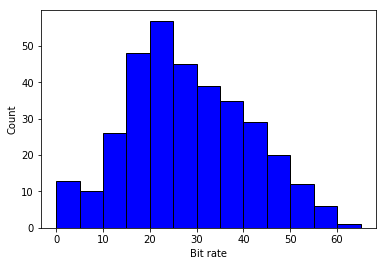

In [97]:
plt.hist(df['BitRate'], bins = [5*x for x in range(14)],facecolor='blue', edgecolor = 'black')
plt.xlabel('Bit rate')
plt.ylabel('Count')
plt.show()

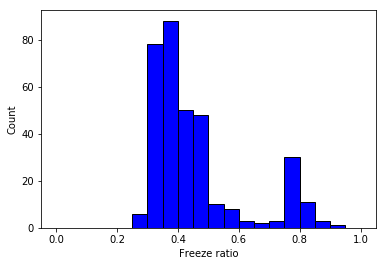

In [100]:
plt.hist(df['FreezeRatio'], bins = [0.05*x for x in range(21)],facecolor='blue', edgecolor = 'black')
plt.xlabel('Freeze ratio')
plt.ylabel('Count')
plt.show()

In [47]:
# Train_test split and scaling

X_train, X_test, y_train, y_test = train_test_split(df[['BitRate', 'FreezeRatio']], df['Quality'], test_size = 0.25, random_state = 1)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
# Decision tree classifier
depth = 2
dt = DecisionTreeClassifier(max_depth = depth)
dt_pred = dt.fit(X_train, y_train).predict(X_test)
dt_pred

array([0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       1, 1, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 2], dtype=int32)

In [75]:
cm_dt = confusion_matrix(y_test, dtree_predictions)
cm_dt

array([[24,  0,  2],
       [ 6,  8, 12],
       [ 1,  3, 30]])

In [84]:
# SVM classfier
params = [1, 0.1, 0.01]
kernels = ['linear', 'poly']
accuracies_svm = {}
cm_svm = {}
for k in kernels:
    accuracies_svm[k] = {}
    cm_svm[k] = {}
    for x in params: 
        sv = SVC(kernel = k, C = x)
        svm_linear = sv.fit(X_train, y_train)
        svm_pred = sv.fit(X_train, y_train).predict(X_test)
        accuracies_svm[k]['C = {}'.format(x)] = svm_linear.score(X_test, y_test)
        cm_svm[k]['C = {}'.format(x)] = confusion_matrix(y_test, svm_pred)

In [85]:
print(cm_svm)
print(accuracies_svm)

{'linear': {'C = 1': array([[25,  1,  0],
       [ 1, 18,  7],
       [ 1,  6, 27]]), 'C = 0.1': array([[23,  3,  0],
       [ 0, 20,  6],
       [ 1,  5, 28]]), 'C = 0.01': array([[20,  5,  1],
       [ 1,  0, 25],
       [ 1,  0, 33]])}, 'poly': {'C = 1': array([[21,  5,  0],
       [ 0, 26,  0],
       [ 1, 11, 22]]), 'C = 0.1': array([[17,  9,  0],
       [ 0, 26,  0],
       [ 1, 17, 16]]), 'C = 0.01': array([[12,  0, 14],
       [ 0,  0, 26],
       [ 0,  0, 34]])}}
{'linear': {'C = 1': 0.81395348837209303, 'C = 0.1': 0.82558139534883723, 'C = 0.01': 0.61627906976744184}, 'poly': {'C = 1': 0.80232558139534882, 'C = 0.1': 0.68604651162790697, 'C = 0.01': 0.53488372093023251}}


In [86]:
# k-nearest_neighbors

nbs = range(1, 10)
accuracies_knn = {}
cm_knn = {}
for x in nbs:
    knn = KNeighborsClassifier(n_neighbors = x).fit(X_train, y_train)
    accuracies_knn['n = {}'.format(x)] = knn.score(X_test, y_test)
    knn_predictions = knn.predict(X_test) 
    cm_knn['n = {}'.format(x)] = confusion_matrix(y_test, knn_predictions)

In [87]:
print(cm)
print(accuracies)

{'n = 1': array([[25,  1,  0],
       [ 1, 19,  6],
       [ 1,  6, 27]]), 'n = 2': array([[26,  0,  0],
       [ 3, 19,  4],
       [ 1, 10, 23]]), 'n = 3': array([[25,  1,  0],
       [ 2, 19,  5],
       [ 1,  5, 28]]), 'n = 4': array([[26,  0,  0],
       [ 2, 19,  5],
       [ 1,  8, 25]]), 'n = 5': array([[26,  0,  0],
       [ 2, 19,  5],
       [ 1,  5, 28]]), 'n = 6': array([[26,  0,  0],
       [ 2, 20,  4],
       [ 1,  7, 26]]), 'n = 7': array([[25,  1,  0],
       [ 3, 16,  7],
       [ 1,  4, 29]]), 'n = 8': array([[26,  0,  0],
       [ 3, 18,  5],
       [ 1,  5, 28]]), 'n = 9': array([[25,  1,  0],
       [ 3, 16,  7],
       [ 1,  4, 29]])}
{'n = 1': 0.82558139534883723, 'n = 2': 0.79069767441860461, 'n = 3': 0.83720930232558144, 'n = 4': 0.81395348837209303, 'n = 5': 0.84883720930232553, 'n = 6': 0.83720930232558144, 'n = 7': 0.81395348837209303, 'n = 8': 0.83720930232558144, 'n = 9': 0.81395348837209303}


In [89]:
# Naive Bayes classifier

gnb = GaussianNB().fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
accuracy_nb = gnb.score(X_test, y_test)
cm_nb = confusion_matrix(y_test, gnb_pred)

In [90]:
print(accuracy_nb)
print(cm_nb)

0.813953488372
[[22  4  0]
 [ 2 20  4]
 [ 1  5 28]]
